## 100DayOfMachineLearningCode
## Day_1 (LinearRegression Model)

### Implemented Simple [LinearRegression](https://en.wikipedia.org/wiki/Linear_regression) Model on Housing Data

### Import Libraries

In [1]:
from collections import Counter

import numpy as np  #for computation purpose
import pandas as pd #for manipulation of the data

#for visualization
import matplotlib.pyplot as plt 
import seaborn as sns

#for preprocessing, splitting, ml modeling and the evaluation metrics
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

#for statistical purpose
import scipy.stats as st
import statsmodels.api as sm

C:\Users\sngupta\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
%matplotlib inline

In [3]:
plt.style.use('ggplot')

In [4]:
sns.set(style= 'darkgrid', color_codes= True)

In [5]:
#Read the data using pandas
train= pd.read_csv('train/train.csv')
test= pd.read_csv('test/test.csv')

In [6]:
#Check out the shape of the train and test data
print('The shape of train data: ', train.shape)
print('The shape of test data: ', test.shape)

The shape of train data:  (17384, 21)
The shape of test data:  (4229, 20)


### Glimpse of the data

In [7]:
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
test.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,114101516,20140528T000000,3,1.0,1430,19901,1.5,0,0,4,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
1,9297300055,20150124T000000,4,3.0,2950,5000,2.0,0,3,3,9,1980,970,1979,0,98126,47.5714,-122.375,2140,4000
2,1202000200,20141103T000000,3,2.0,1710,4697,1.5,0,0,5,6,1710,0,1941,0,98002,47.3048,-122.218,1030,4705
3,8562750320,20141110T000000,3,2.5,2320,3980,2.0,0,0,3,8,2320,0,2003,0,98027,47.5391,-122.070,2580,3980
4,7589200193,20141110T000000,3,1.0,1090,3000,1.5,0,0,4,8,1090,0,1929,0,98117,47.6889,-122.375,1570,5080


### Statistical Overview

In [9]:
#information of the train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17384 entries, 0 to 17383
Data columns (total 21 columns):
id               17384 non-null int64
date             17384 non-null object
price            17384 non-null float64
bedrooms         17384 non-null int64
bathrooms        17384 non-null float64
sqft_living      17384 non-null int64
sqft_lot         17384 non-null int64
floors           17384 non-null float64
waterfront       17384 non-null int64
view             17384 non-null int64
condition        17384 non-null int64
grade            17384 non-null int64
sqft_above       17384 non-null int64
sqft_basement    17384 non-null int64
yr_built         17384 non-null int64
yr_renovated     17384 non-null int64
zipcode          17384 non-null int64
lat              17384 non-null float64
long             17384 non-null float64
sqft_living15    17384 non-null int64
sqft_lot15       17384 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 2.8+ MB


In [10]:
#information of the test data
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4229 entries, 0 to 4228
Data columns (total 20 columns):
id               4229 non-null int64
date             4229 non-null object
bedrooms         4229 non-null int64
bathrooms        4229 non-null float64
sqft_living      4229 non-null int64
sqft_lot         4229 non-null int64
floors           4229 non-null float64
waterfront       4229 non-null int64
view             4229 non-null int64
condition        4229 non-null int64
grade            4229 non-null int64
sqft_above       4229 non-null int64
sqft_basement    4229 non-null int64
yr_built         4229 non-null int64
yr_renovated     4229 non-null int64
zipcode          4229 non-null int64
lat              4229 non-null float64
long             4229 non-null float64
sqft_living15    4229 non-null int64
sqft_lot15       4229 non-null int64
dtypes: float64(4), int64(15), object(1)
memory usage: 660.9+ KB


#### 1. Here, we observed that the is preprocessed.
#### 2. The label to predict is "price".

In [11]:
#the description of the train dataset
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,17384.0,4.574349e+09,2.872356e+09,1.000102e+06,2.124087e+09,3.892800e+09,7.304301e+09,9.900000e+09
price,17384.0,5.393666e+05,3.696912e+05,7.500000e+04,3.200000e+05,4.500000e+05,6.400000e+05,7.700000e+06
bedrooms,17384.0,3.369363e+00,9.064675e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,1.000000e+01
bathrooms,17384.0,2.115048e+00,7.717825e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,17384.0,2.080030e+03,9.216309e+02,2.900000e+02,1.420000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,17384.0,1.509191e+04,4.145927e+04,5.200000e+02,5.049500e+03,7.616000e+03,1.066525e+04,1.651359e+06
floors,17384.0,1.494248e+00,5.394427e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,17384.0,7.650713e-03,8.713562e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,17384.0,2.360792e-01,7.680083e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,17384.0,3.410780e+00,6.497921e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [12]:
#description of the test dataset
test.describe().T

,count,mean,std,min,25%,50%,75%,max
id,4229.0,4.604771e+09,2.894017e+09,1.000102e+06,2.110900e+09,4.019301e+09,7.338220e+09,9.895000e+09
bedrooms,4229.0,3.376921e+00,1.021434e+00,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,4229.0,2.113561e+00,7.635600e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,7.750000e+00
sqft_living,4229.0,2.079366e+03,9.053175e+02,3.700000e+02,1.430000e+03,1.920000e+03,2.550000e+03,9.890000e+03
sqft_lot,4229.0,1.516886e+04,4.126563e+04,6.000000e+02,5.027000e+03,7.633000e+03,1.076000e+04,1.024068e+06
floors,4229.0,1.494561e+00,5.422925e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,4229.0,7.093876e-03,8.393580e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,4229.0,2.270040e-01,7.593747e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,4229.0,3.403878e+00,6.546855e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
grade,4229.0,7.664460e+00,1.198476e+00,4.000000e+00,7.000000e+00,7.000000e+00,8.000000e+00,1.300000e+01


#### From the description of the data we come to know about the
1. No. of data instance present
2. Mean of each continuous features
3. Standard Deviation of each continuous features
4. Minimum
5. Maximum
6. First Quantile (25%)
7. Third Quantile (75%)

### Check Null Values Present

In [13]:
#use isnull() method of pandas to find the null values present in the dataset
#train dataset
train.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [14]:
#test dataset
test.isnull().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

1. There are no any null values present in the dataset of train and test.
2. All the features are continuous except the "date" (data type is object).
3. Have converted the "date" into datetime format and extracted the year and month from that.

In [15]:
#converted the date object to datetime format using pandas to_datetime() method
train['date']= pd.to_datetime(train['date'])
test['date']= pd.to_datetime(test['date'])

In [16]:
#check the dtypes of the date now
train['date'].dtypes, test['date'].dtypes
#successfully converted to datetime format

(dtype('<M8[ns]'), dtype('<M8[ns]'))

In [17]:
#extract the year from the date feature
train['year']= pd.DatetimeIndex(train['date']).year
test['year']= pd.DatetimeIndex(test['date']).year

In [18]:
#now drop the date feature from the train and test dataset
train.drop(['date'], axis= 1, inplace= True)
test.drop(['date'], axis= 1, inplace= True)

### Correlation

In [19]:
#for correlation I used pandas corr() method
corr= train.drop(['id'], axis= 1).corr()  #dropped "id" because it is used only as identifier there is no role in modeling

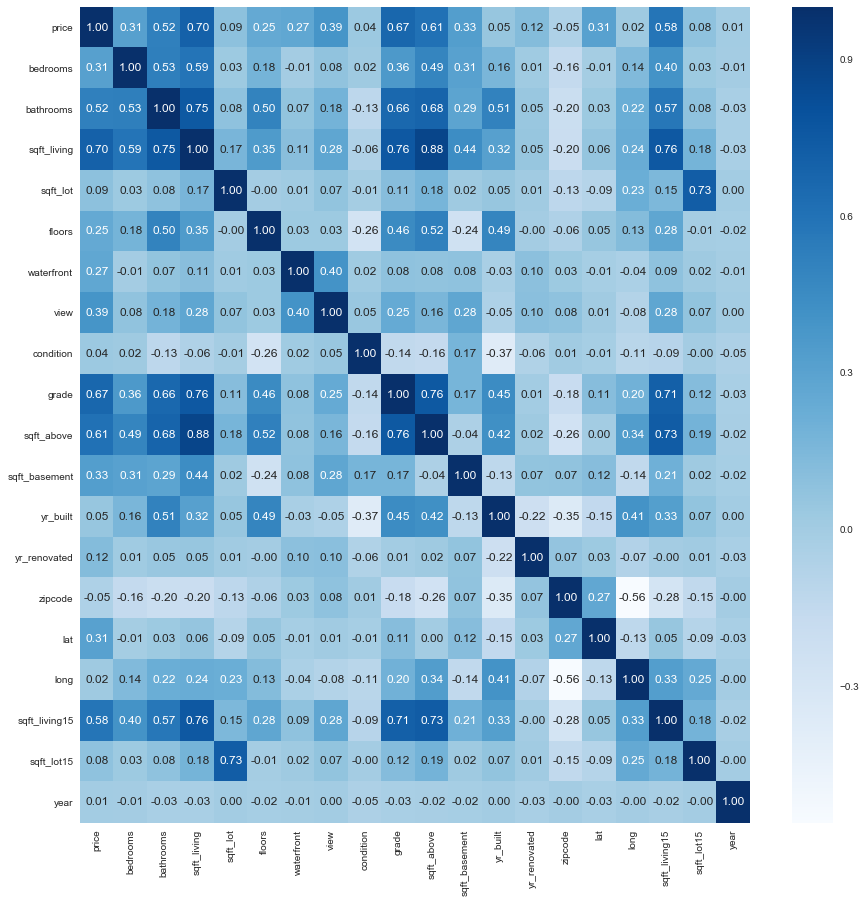

In [20]:
#use heatmap to plot the correlation graph
plt.figure(figsize= (15, 15))
sns.heatmap(data= corr, cmap= 'Blues', annot= True, fmt= '.2f')
plt.show()

In [21]:
#now check out the which features is most correlated with the label feature i.e. "price"
corr[corr['price']>0.5]['price'] #I only consider the significant +correlation

price            1.000000
bathrooms        0.523345
sqft_living      0.702916
grade            0.667348
sqft_above       0.605278
sqft_living15    0.583481
Name: price, dtype: float64

From the above obseravtion I concluded that the "price" of the house mostly depend on the "sqft_living", "grade", "sqft_above", "sqft_living15", "#bathrooms". Because all these features are significantly correlated with the label features.

In [22]:
#Here, according to my intution I added all the are as one i.e. as sqft_area
train['sqft_area']= train['sqft_above'] + train['sqft_basement'] + train['sqft_living'] + train['sqft_living15'] + train['sqft_lot'] + train['sqft_lot15']
test['sqft_area']= test['sqft_above'] + test['sqft_basement'] + test['sqft_living'] + test['sqft_living15'] + test['sqft_lot'] + test['sqft_lot15']

In [23]:
#now drop other sqft area other than sqft_area and the year which doesn't show any significance on correlation with any features
train.drop(['sqft_above', 'sqft_basement', 'sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'year'], axis= 1, inplace= True)
test.drop(['sqft_above', 'sqft_basement', 'sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'year'], axis= 1, inplace= True)

In [24]:
#checkout the shape of the train and test dataset
train.shape, test.shape

((17384, 15), (4229, 14))

### Outliers

In [25]:
#function to detect the outliers present 
def detect_outliers(df, cols, n):
    outlier_indices= []
    
    for col in cols:
        #find the first quantile and third quantile
        Q1= np.percentile(df[col], 25)
        Q3= np.percentile(df[col], 75)
        #interquatile range
        IQR= Q3-Q1
        #steps
        step= 1.5*IQR
        #check if dataset contains any outliers
        outlier_col_list= df[(df[col]<Q1-IQR) | (df[col]>Q3+IQR)].index
        #extend or append the outlier_indices
        outlier_indices.extend(outlier_col_list)
        
    #select observation containing more than n outliers
    outlier_indices= Counter(outlier_indices)
    multiple_outliers= list(k for k, v in outlier_indices.items() if v>n)
    
    return multiple_outliers

In [26]:
cols= train.columns
cols= list(cols)

In [27]:
cols.remove('id')

In [28]:
outlier_to_drop= detect_outliers(train, cols, 2) #passed the parameter dataframe, features and n

In [29]:
#check the outliers
len(outlier_to_drop)

1141

In [30]:
#now drop the outliers
train.drop(index= outlier_to_drop, axis= 0, inplace= True)

Now, here we removed the outliers present in the dataset. Our data is free from the outliers thus now we are not getting much more deviation.

### Skewness

Skew is simply say how much out data is deviated from the continuous Gaussian distribution. It may be Right Skewed and Left Skewed, we come to know from the length of tail that the feature is right skewed and left skewed.
We can overcome the skewness using:
1. Taking log
2. Taking square root
3. Taking cude root

#### Price

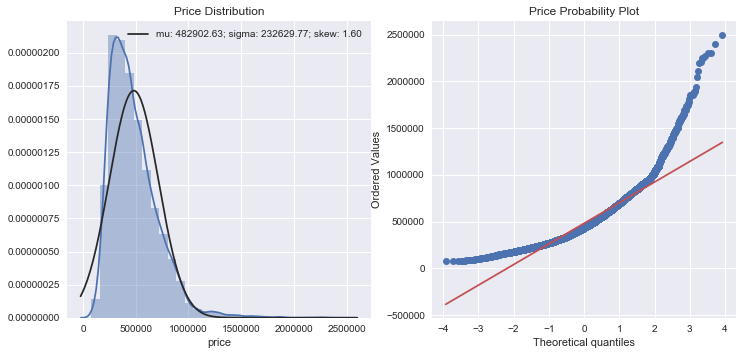

In [31]:
#check the label feature
#for this I used the distribution plot and probplot
#to check the mu and sigma 
(mu, sigma)= st.norm.fit(train['price'])
plt.figure(figsize= (12, 12))
plt.subplot(221)
sns.distplot(train['price'], bins= 30, fit= st.norm)
plt.legend(['mu: {:.2f}; sigma: {:.2f}; skew: {:.2f}' .format(mu, sigma, st.skew(train['price']))], loc= 'best')
plt.title('Price Distribution')

#probaplot using scipy.stats.probplot()
plt.subplot(222)
st.probplot(train['price'], plot= plt)
plt.title('Price Probability Plot')

plt.show()

As we saw the graph the price is Right Skewed with skewness value 1.60, thus to overcome that I used log.

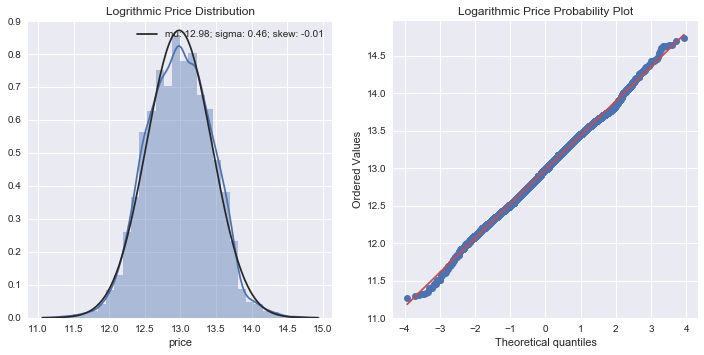

In [32]:
#use log to solve overcome that
(mu, sigma)= st.norm.fit(np.log(train['price']))
plt.figure(figsize= (12, 12))
plt.subplot(221)
sns.distplot(np.log(train['price']), bins= 30, fit= st.norm)
plt.legend(['mu: {:.2f}; sigma: {:.2f}; skew: {:.2f}' .format(mu, sigma, st.skew(np.log(train['price'])))], loc= 'best')
plt.title('Logrithmic Price Distribution')

#probaplot using scipy.stats.probplot()
plt.subplot(222)
st.probplot(np.log(train['price']), plot= plt)
plt.title('Logarithmic Price Probability Plot')

plt.show()

Now as you saw I removed the skewness of the label features, the skewness value is reduced to the -0.01 which is negligible amount. The distrubution graph looks completely like the uniform Gaussian distribution and the deviation of the reduced. Both the graph looks like uniform.

#### sqft_area

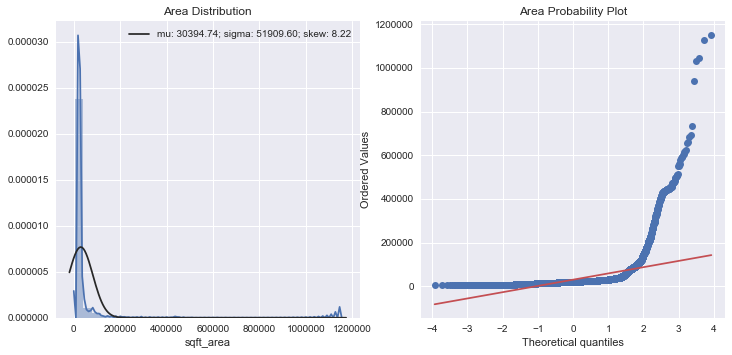

In [33]:
#now check the sqft_area
(mu, sigma)= st.norm.fit(train['sqft_area'])
plt.figure(figsize= (12, 12))
plt.subplot(221)
sns.distplot(train['sqft_area'], bins= 30, fit= st.norm)
plt.legend(['mu: {:.2f}; sigma: {:.2f}; skew: {:.2f}' .format(mu, sigma, st.skew(train['sqft_area']))], loc= 'best')
plt.title('Area Distribution')

#probaplot using scipy.stats.probplot()
plt.subplot(222)
st.probplot(train['sqft_area'], plot= plt)
plt.title('Area Probability Plot')

plt.show()

It looks more deviated of skewness value of 8.2 and probability plot also.

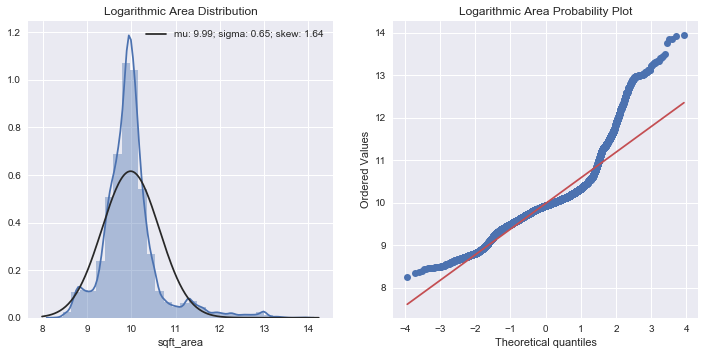

In [34]:
#use log to solve that
(mu, sigma)= st.norm.fit(np.log(train['sqft_area']))
plt.figure(figsize= (12, 12))
plt.subplot(221)
sns.distplot(np.log(train['sqft_area']), bins= 30, fit= st.norm)
plt.legend(['mu: {:.2f}; sigma: {:.2f}; skew: {:.2f}' .format(mu, sigma, st.skew(np.log(train['sqft_area'])))], loc= 'best')
plt.title('Logarithmic Area Distribution')

#probaplot using scipy.stats.probplot()
plt.subplot(222)
st.probplot(np.log(train['sqft_area']), plot= plt)
plt.title('Logarithmic Area Probability Plot')

plt.show()

Here, I reduces the skewness from 8.2 to 1.64 which is quite significant but let once try with the square root.

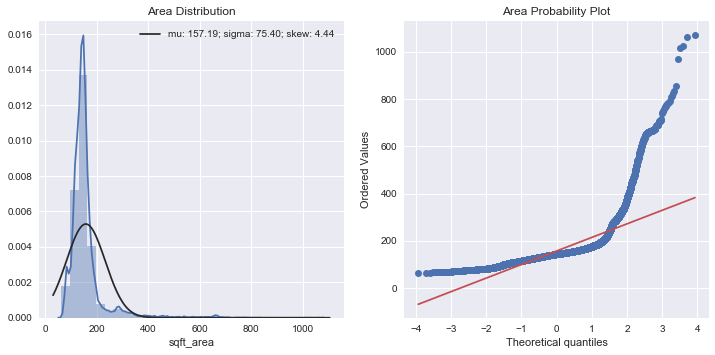

In [35]:
#use square root
(mu, sigma)= st.norm.fit(np.sqrt(train['sqft_area']))
plt.figure(figsize= (12, 12))
plt.subplot(221)
sns.distplot(np.sqrt(train['sqft_area']), bins= 30, fit= st.norm)
plt.legend(['mu: {:.2f}; sigma: {:.2f}; skew: {:.2f}' .format(mu, sigma, st.skew(np.sqrt(train['sqft_area'])))], loc= 'best')
plt.title('Area Distribution')

#probaplot using scipy.stats.probplot()
plt.subplot(222)
st.probplot(np.sqrt(train['sqft_area']), plot= plt)
plt.title('Area Probability Plot')

plt.show()

Not gave the significant result let once try with the cube root.

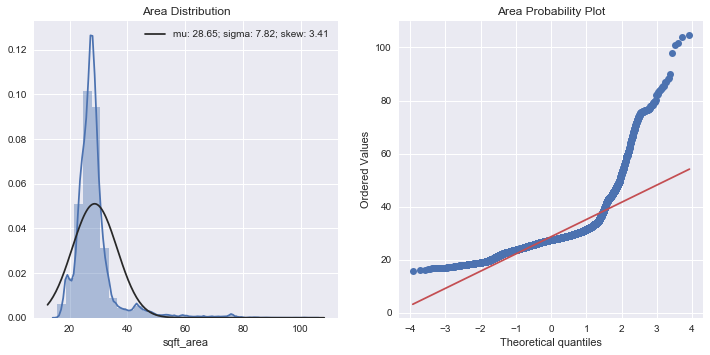

In [36]:
#use cube root
(mu, sigma)= st.norm.fit(np.power(train['sqft_area'], 1/3))
plt.figure(figsize= (12, 12))
plt.subplot(221)
sns.distplot(np.power(train['sqft_area'], 1/3), bins= 30, fit= st.norm)
plt.legend(['mu: {:.2f}; sigma: {:.2f}; skew: {:.2f}' .format(mu, sigma, st.skew(np.power(train['sqft_area'], 1/3)))], loc= 'best')
plt.title('Area Distribution')

#probaplot using scipy.stats.probplot()
plt.subplot(222)
st.probplot(np.power(train['sqft_area'], 1/3), plot= plt)
plt.title('Area Probability Plot')

plt.show()

Among all the three variants the log is appropriate.

#### price vs sqft_area

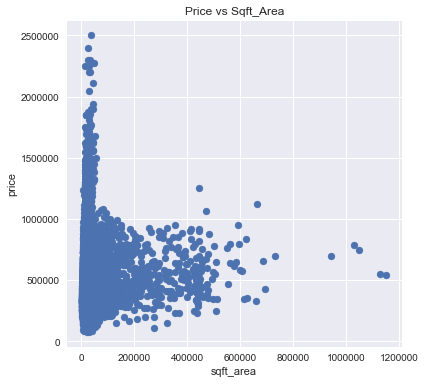

In [37]:
#checkout how the price vary with the sqft_area
plt.figure(figsize= (6,6))
plt.scatter('sqft_area', 'price', data= train, cmap= 'Blues')
plt.title('Price vs Sqft_Area')
plt.xlabel('sqft_area')
plt.ylabel('price')
plt.show()

The above figure not show uniform distribution of data between sqft_area and price.

In [38]:
#checkout the correlation between the sqft_area and price
#use np.corrcoef()
np.corrcoef(train['price'], train['sqft_area'])

array([[1.        , 0.08608432],
       [0.08608432, 1.        ]])

The correlation is also not significant its just negligible.

#### price vs zipcode

In [39]:
#check the correlation between the price and the zipcode
np.corrcoef(train['zipcode'], train['price'])

array([[ 1.        , -0.01173373],
       [-0.01173373,  1.        ]])

No correlation between the zipcode and the price. Thus we can drop that.

From the above now I have to change:
1. Take log of price
2. Take log of sqft_area
3. Drop zip code

In [40]:
#change price to logrithmic price
train['price']= np.log(train['price'])
#change sqft_area to logrithmic sqft_area
train['sqft_area']= np.log(train['sqft_area'])
#drop zipcode
train.drop(['zipcode'], axis= 1, inplace= True)

In [41]:
#similarly for the test data
#change the sqft_area to logarithmic sqft_area
test['sqft_area']= np.log(test['sqft_area'])
#drop the zipcode
test.drop(['zipcode'], axis= 1, inplace= True)

#### Backward Elimination using the statsmodels.OLS()

Now, the data is completly prepared for the machine learning before going to scikit-learn library.
I want to check the significant features using statsmodels p-value, consider those features whose p-value less than 0.05 which is significant.

In [42]:
#split the training data into train and validation split I consider 80% data for train and 20% for validation.
#drop the id from test and train
new_train= train.drop(['id', 'price'], axis= 1)
new_test= test.drop(['id'], axis= 1)
target= train['price']
#spliting
X_train, X_test, y_train, y_test= train_test_split(new_train, target, test_size= 0.2, random_state= 42)

In [43]:
#create the object of OLS model and fit it
lin_reg_ols= sm.OLS(y_train, X_train).fit()
#print summary 
print(lin_reg_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.669e+06
Date:                Sat, 07 Jul 2018   Prob (F-statistic):               0.00
Time:                        22:24:11   Log-Likelihood:                -1010.5
No. Observations:               12994   AIC:                             2045.
Df Residuals:                   12982   BIC:                             2135.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
bedrooms         0.0241      0.003      7.626   

Here, observed the p-values of all the features is according to the condition except the features yr_renovated,
now remove the feature yr_renovated then check.

In [44]:
#drop feature yr_renovated
lin_reg_ols= sm.OLS(y_train, X_train.drop(['yr_renovated'], axis= 1)).fit()
#print summary
print(lin_reg_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.911e+06
Date:                Sat, 07 Jul 2018   Prob (F-statistic):               0.00
Time:                        22:24:12   Log-Likelihood:                -1011.0
No. Observations:               12994   AIC:                             2044.
Df Residuals:                   12983   BIC:                             2126.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
bedrooms       0.0240      0.003      7.599      0.0

Now, here it shows all the features are significant according to the p-values condition.

The is ready for the machine learning.
Now, I used the scikit-learn library for the modeling.

In [45]:
#define the template of the machine learning modeling
def ml_modeling(model, xtrain, xtest, ytrain, ytest, name):
    print('Use Model: ', name)
    #fit the data into the model
    model.fit(xtrain, ytrain)
    #predict the test data
    prediction= model.predict(xtest)
    #evaluation metrics
    mean_sq_error= mean_squared_error(ytest, prediction)
    mean_abs_error= mean_absolute_error(ytest, prediction)
    root_mean_sq_error= np.sqrt(mean_sq_error)
    
    print('MAE(Mean Absolute Error): {:.4f}' .format(mean_abs_error))
    print('MSE(Mean Squared Error): {:.4f}' .format(mean_sq_error))
    print('RMSE(Root Mean Squared Error): {:.4f}' .format(root_mean_sq_error))
    
    #now check how the prediction line and measured line vary using visualization
    plt.scatter(ytest, prediction, cmap= 'Blues', alpha= 0.8)
    #plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'r--', lw= 4.0, label= 'Measured')
    #plt.plot([prediction.min(), prediction.max()], [prediction.min(), prediction.max()], 'k--', lw= 4.0, label= 'Predicted')
    #plt.plot(ytest, prediction, 'k--', lw= 4.0)
    plt.title('Predicted vs Measured')
    plt.xlabel('Measured')
    plt.ylabel('Predicted')
    #plt.legend(loc= 4)
    plt.show()

Use Model:  LinearRegression
MAE(Mean Absolute Error): 0.2007
MSE(Mean Squared Error): 0.0664
RMSE(Root Mean Squared Error): 0.2577


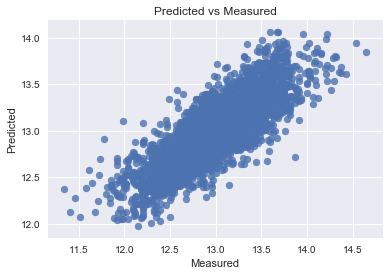

In [46]:
#create the object of linear regression model
reg_lin= LinearRegression()
#call the function or method of ml_modeling
ml_modeling(reg_lin, X_train, X_test, y_train, y_test, 'LinearRegression')

#### From the garph I observed that the plot between Measured and Predicted is linear. An thus if you observed the RMSE and MAE is quite significant not much values are.
#### That is overall process of how to do the LinearMultipleRegression modeling using scikit-learn library. 

### Thank you